najpierw import bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

trzeba teraz wczytac dane

In [2]:
df=pd.read_csv('fatal-police-shootings-data.csv')
median_house_hold_in_come = pd.read_csv('MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")

Text(0.5, 1.0, 'Poverty Rate Given States')

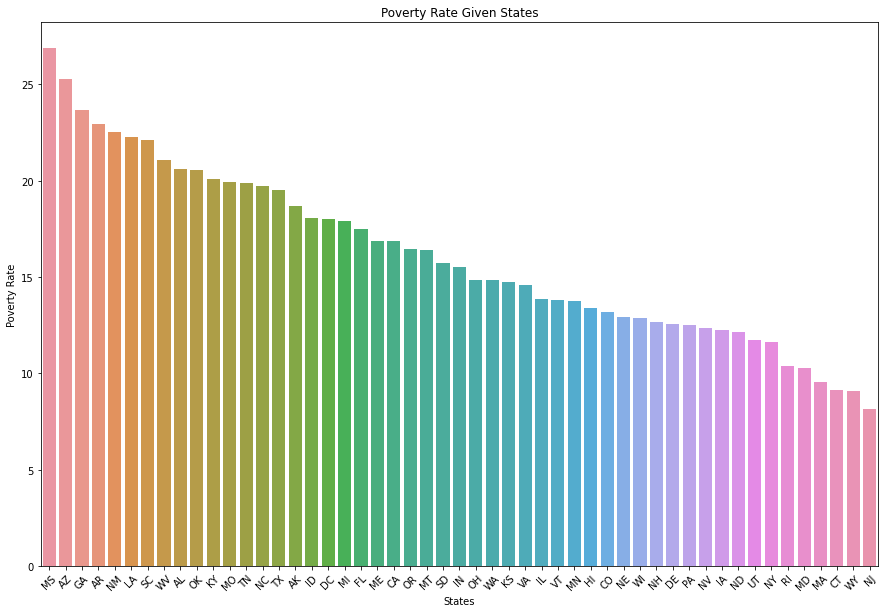

In [3]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data_poverty = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data_poverty['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data_poverty.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

[Text(0, 0.5, 'Race of People'),
 Text(0.5, 0, 'Cities'),
 Text(0.5, 1.0, ' The percentage of States Population According to Races')]

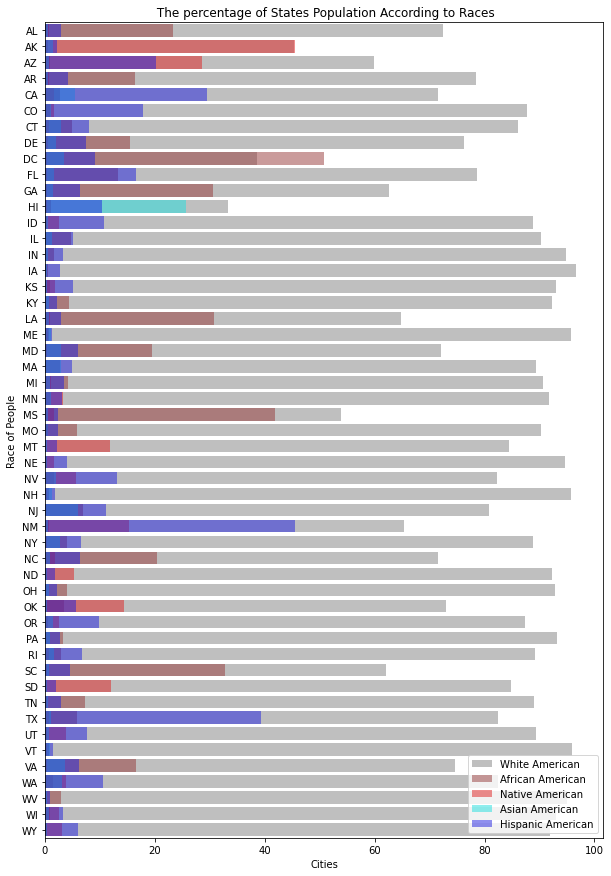

In [4]:
share_race_city.replace(['-'], 0.0, inplace = True)
share_race_city.replace(['(X)'], 0.0, inplace= True)
share_race_city.loc[:,['share_white','share_black','share_native_american', 'share_asian', 'share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american', 'share_asian', 'share_hispanic']].astype(float)
city_list = list(share_race_city['Geographic area'].unique())

white_rate = []
black_rate = []
native_rate = []
asian_rate = []
hispanic_rate = []

for each in city_list:
    tmp = share_race_city[share_race_city['Geographic area'] == each]
    white_rate.append(sum(tmp.share_white) / len(tmp))
    black_rate.append(sum(tmp.share_black) / len(tmp))
    native_rate.append(sum(tmp.share_native_american) / len(tmp))
    asian_rate.append(sum(tmp.share_asian) / len(tmp))
    hispanic_rate.append(sum(tmp.share_hispanic) / len(tmp))
    
    
#visualization
f,vs = plt.subplots(figsize = (10, 15))
sns.barplot(x = white_rate, y = city_list, color = 'grey', alpha = 0.5, label = 'White American')
sns.barplot(x = black_rate, y = city_list, color = 'brown', alpha = 0.5, label = 'African American')
sns.barplot(x = native_rate, y = city_list, color = 'red', alpha = 0.5, label = 'Native American')
sns.barplot(x = asian_rate, y = city_list, color = 'aqua', alpha = 0.5, label = 'Asian American')
sns.barplot(x = hispanic_rate, y = city_list, color = 'blue', alpha = 0.5, label = 'Hispanic American')
vs.legend(loc = 'lower right', frameon = True)
vs.set(xlabel = 'Cities', ylabel = 'Race of People', title = ' The percentage of States Population According to Races')

In [5]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Let's start!

In EDA we try to look at the data without bias and assumption and further questions should appear in the end of analysis, but based only on column names we can just now put the obvious questions:
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

It seems we don't need all columns
body_camera isn't valuable information for now, because we can't conclude if police officers don't shoot when they have body cameras if we don't have data of other incidents. And also, that is not the case of this analysis.


There are a lot of None data

For age column it's not the problem, because age 

In [7]:
df=df.drop(["id", "name", "body_camera"], axis=1)

In [8]:
df=df.dropna(axis=0, subset=['race'])
df=df.dropna(axis=0, subset=['armed'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4595 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 406.6+ KB


In [10]:
round(df[['age']].mean(axis=0, skipna=True),0)

age    37.0
dtype: float64

In [11]:
df_multiindex=df.set_index(["date", "race", "city"])
df_multiindex


manner_of_death       armed   age gender  \
date       race city                                                       
2015-01-02 A    Shelton                    shot         gun  53.0      M   
           W    Aloha                      shot         gun  47.0      M   
2015-01-03 H    Wichita        shot and Tasered     unarmed  23.0      M   
2015-01-04 W    San Francisco              shot  toy weapon  32.0      M   
           H    Evans                      shot    nail gun  39.0      M   
...                                         ...         ...   ...    ...   
2020-06-12 B    Atlanta                    shot       Taser  27.0      M   
                Crown Point                shot         gun  23.0      M   
2020-06-13 W    Sedalia                    shot     unarmed  25.0      F   
                Kansas City                shot         gun  22.0      M   
2020-06-15 W    Lawrence                   shot         gun  31.0      M   

                              state  signs_of_mental_illness threat_level  \
date       race city                                                        
2015-01-02 A    Shelton          WA                     True       attack   
           W    Aloha            OR                    False       attack   
2015-01-03 H    Wichita          KS                    False        other   
2015-01-04 W    San Francisco    CA                     True       attack   
           H    Evans            CO                    False       attack   
...                             ...                      ...          ...   
2020-06-12 B    Atlanta          GA                    False       attack   
                Crown Point      IN                    False       attack   
2020-06-13 W    Sedalia          MO                    False        other   
                Kansas City      MO                    False        other   
2020-06-15 W    Lawrence         KS                    False       attack   

                                      flee  
date       race city                        
2015-01-02 A    Shelton        Not fleeing  
           W    Aloha          Not fleeing  
2015-01-03 H    Wichita        Not fleeing  
2015-01-04 W    San Francisco  Not fleeing  
           H    Evans          Not fleeing  
...                                    ...  
2020-06-12 B    Atlanta               Foot  
                Crown Point            Car  
2020-06-13 W    Sedalia        Not fleeing  
                Kansas City          Other  
2020-06-15 W    Lawrence               Car  

[4678 rows x 8 columns]

In [12]:
df_multiindex.groupby(level=1).mean()["age"]

race
A    36.761364
B    32.569777
H    33.797362
N    31.837838
O    33.022727
W    40.078498
Name: age, dtype: float64

In [13]:
df['age'] = df.groupby(['race'])['age'].transform(lambda x: x.fillna(x.mean()))


In [14]:
#df["age"].fillna(value=int(round(df[['age']].mean(axis=0, skipna=True),0)),axis=0, inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4678 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 406.6+ KB


In [16]:
df=df.dropna(axis=0, subset=['armed'])

In [17]:
# Adding total_population column with data corresponding to race

conditions = [df["race"]=="A", df["race"]=="W", df["race"]=="H", df["race"]=="B", df["race"]=="N", df["race"]=="O"]
race_populations = [14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

df["total_population_race"] = np.select(conditions, race_populations, default="zero")

In [18]:
# need similiar thing with states
#states_total=pd.read_csv('states total populationxlsx.csv', ind)
#states_total

[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

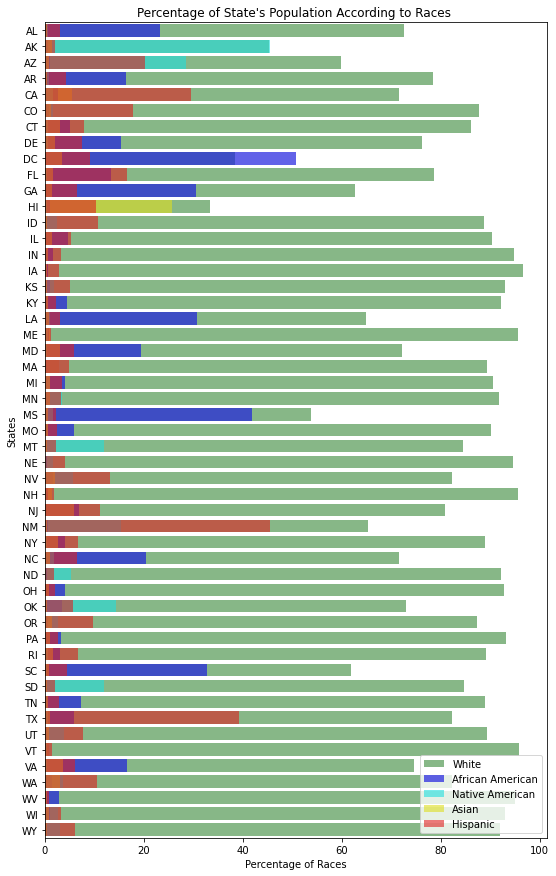

In [19]:


# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

chcemy teraz rozbic date z danym na miesiace i lata

In [20]:
#df['month']=pd.to_datetime(df['date']).dt.month
#df['year']=pd.to_datetime(df['date']).dt.year

In [21]:
df

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,total_population_race
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,14674252
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,223553265
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,50477594
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,223553265
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,50477594
...,...,...,...,...,...,...,...,...,...,...,...,...
5408,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,38929319
5409,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,38929319
5410,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,223553265
5411,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,223553265


We don't need date column anymore

In [22]:
#df=df.drop(columns='date')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4678 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
 11  total_population_race    4678 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 443.1+ KB


teraz patrzymy na luki w danych

In [24]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [25]:
df=df.dropna(axis=0, subset=['race'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4678 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
 11  total_population_race    4678 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 443.1+ KB


In [27]:
df=df.dropna(axis=0, subset=['armed'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4678 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
 11  total_population_race    4678 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 443.1+ KB


In [29]:
round(df[['age']].mean(axis=0, skipna=True),0)

age    37.0
dtype: float64

In [30]:
df["age"].fillna(round(df[['age']].mean(axis=0, skipna=True),0),inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4678 entries, 0 to 5413
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4678 non-null   object 
 1   manner_of_death          4678 non-null   object 
 2   armed                    4678 non-null   object 
 3   age                      4678 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4678 non-null   object 
 6   city                     4678 non-null   object 
 7   state                    4678 non-null   object 
 8   signs_of_mental_illness  4678 non-null   bool   
 9   threat_level             4678 non-null   object 
 10  flee                     4478 non-null   object 
 11  total_population_race    4678 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 443.1+ KB


In [32]:
df=df.dropna(axis=0, subset=['gender'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 5413
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4677 non-null   object 
 1   manner_of_death          4677 non-null   object 
 2   armed                    4677 non-null   object 
 3   age                      4677 non-null   float64
 4   gender                   4677 non-null   object 
 5   race                     4677 non-null   object 
 6   city                     4677 non-null   object 
 7   state                    4677 non-null   object 
 8   signs_of_mental_illness  4677 non-null   bool   
 9   threat_level             4677 non-null   object 
 10  flee                     4477 non-null   object 
 11  total_population_race    4677 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 443.0+ KB


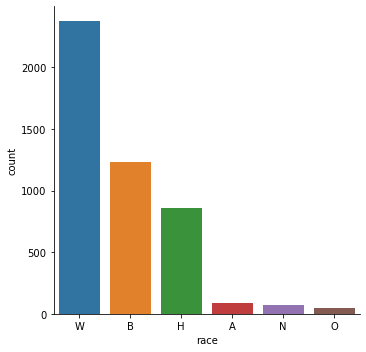

In [34]:
sns.catplot(x="race", 
            data=df,
            order=df['race'].value_counts().index,
            kind='count')


In [35]:
races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df.race.loc[(df.race==i)].count()
    killed_per_race.append(i_killings)
    
print (killed_per_race)

[90, 2376, 857, 1234, 75, 45]


In [36]:
prop_killed_per_race = []

for i in races:
    
    if i == "A":
        prop_i_killed = killed_per_race[0]/14674252.0
        print (prop_i_killed)
    elif i == "W":
        prop_i_killed = killed_per_race[1]/223553265.0
        print (prop_i_killed)
    elif i == "H":
        prop_i_killed = killed_per_race[2]/50477594.0
        print (prop_i_killed)
    elif i == "B":
        prop_i_killed = killed_per_race[3]/38929319.0
        print (prop_i_killed)
    elif i == "N":
        prop_i_killed = killed_per_race[4]/2932248.0
        print (prop_i_killed)
    else:
        prop_i_killed = killed_per_race[5]/22579629.0
        print (prop_i_killed)
    
    prop_killed_per_race.append(prop_i_killed)

6.133191661149066e-06
1.0628339514522411e-05
1.6977829807022893e-05
3.16984738417849e-05
2.557764554703422e-05
1.9929468283114837e-06


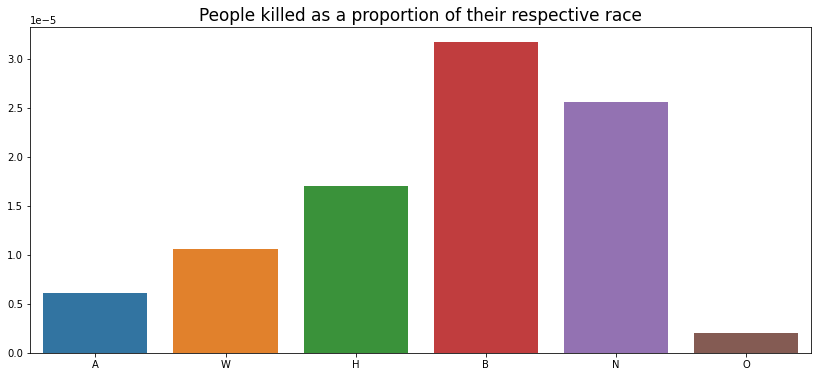

In [37]:
plt.figure(figsize=(14,6))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(x=races, y=prop_killed_per_race)

95.57408595253368% of the victims are male.


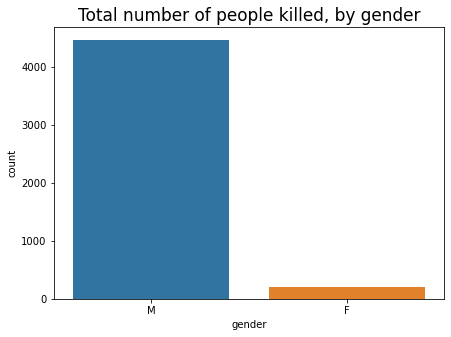

In [38]:
female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()
perc_male = (male*100)/(male+female) 

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="gender")

plt.title("Total number of people killed, by gender", fontsize=17)

print (str(perc_male) + "% " + "of the victims are male.")

Text(0.5, 1.0, 'Age distribution')

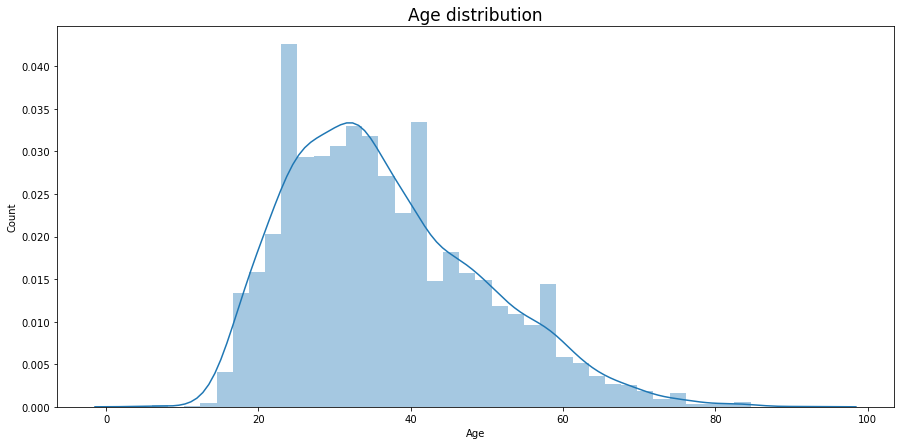

In [39]:
plt.figure(figsize=(15,7))
age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17)

/home/paszko/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age distribution, by race')

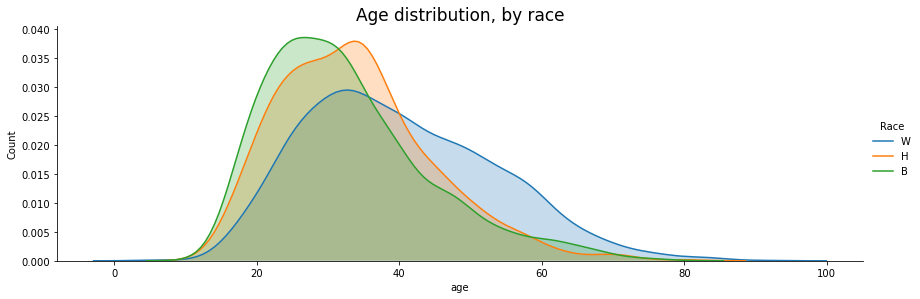

In [40]:
three_races = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H")]

g = sns.FacetGrid(data=three_races, hue="race", aspect=3, size=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

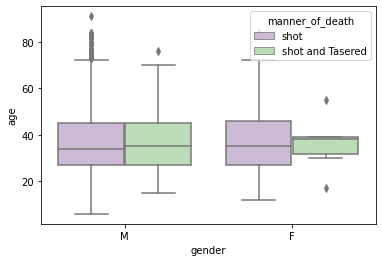

In [41]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=df, palette="PRGn")
plt.show()

Text(0.5, 1.0, 'Most dangerous cities')

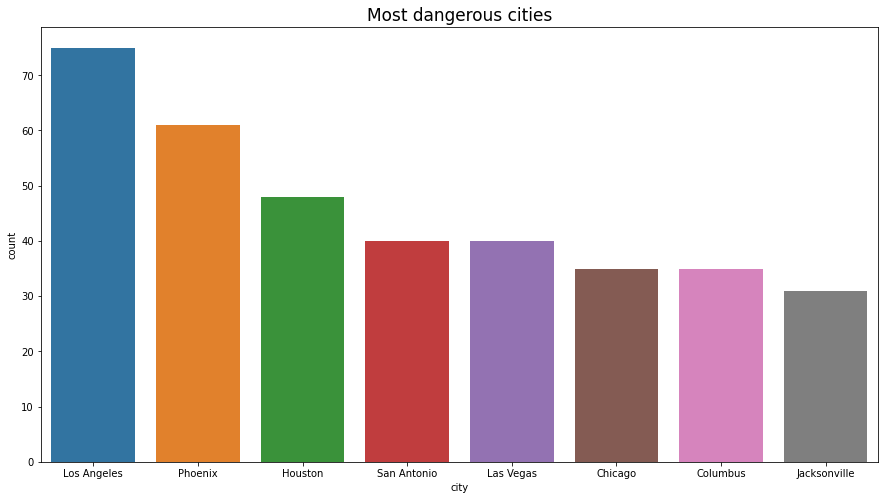

In [42]:
city = df["city"].value_counts(ascending=False)

df_city = df.filter(["city"], axis=1)
df_city["count"] = 1

grouped_city = df_city.groupby("city", as_index=False,sort=False).sum()
grouped_city.sort_index(ascending=False)

grouped_city = grouped_city.sort_values("count", ascending=False).head(8)                                                       

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_city, x="city", y="count")
plt.title("Most dangerous cities", fontsize=17)

Text(0.5, 1.0, 'Most common ways of being armed')

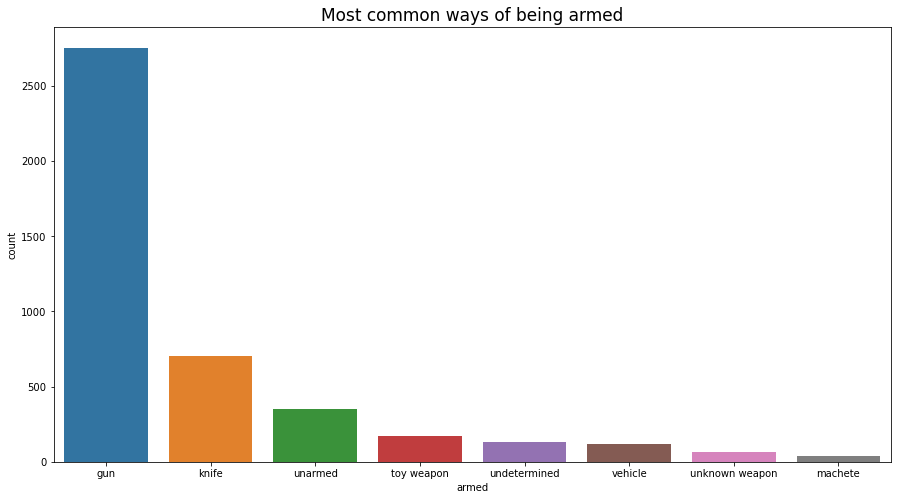

In [43]:
armed = df.armed.value_counts(ascending=False)

df_armed = df.filter(["armed"], axis=1)
df_armed["count"] = 1

grouped_armed = df_armed.groupby("armed", as_index=False,sort=False).sum()
grouped_armed.sort_index(ascending=False)

grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_armed, x="armed", y="count")
plt.title("Most common ways of being armed", fontsize=17)

In [44]:

median_house_hold_in_come["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
median_house_hold_in_come["city"] = median_house_hold_in_come["City"] + ", " + median_house_hold_in_come["Geographic Area"]
median_house_hold_in_come.drop(["Geographic Area", "City"], axis=1, inplace=True)


percentage_people_below_poverty_level["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
percentage_people_below_poverty_level["city"] = percentage_people_below_poverty_level["City"] + ", " + percentage_people_below_poverty_level["Geographic Area"]
percentage_people_below_poverty_level.drop(["Geographic Area", "City"], axis=1, inplace=True)


share_race_city["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True) 
share_race_city["city"] = share_race_city["City"] + ", " + share_race_city["Geographic area"]
share_race_city.drop(["Geographic area", "City"], axis=1, inplace=True)


percent_over_25_completed_highSchool["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
percent_over_25_completed_highSchool["city"] = percent_over_25_completed_highSchool["City"] + ", " + percent_over_25_completed_highSchool["Geographic Area"]
percent_over_25_completed_highSchool.drop(["Geographic Area", "City"], axis=1, inplace=True)

In [45]:
df

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,total_population_race
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,14674252
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,223553265
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,50477594
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,223553265
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,50477594
...,...,...,...,...,...,...,...,...,...,...,...,...
5408,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,38929319
5409,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,38929319
5410,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,223553265
5411,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,223553265


In [46]:
df

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,total_population_race
0,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,14674252
1,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,223553265
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,50477594
3,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,223553265
4,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,50477594
...,...,...,...,...,...,...,...,...,...,...,...,...
5408,2020-06-12,shot,Taser,27.0,M,B,Atlanta,GA,False,attack,Foot,38929319
5409,2020-06-12,shot,gun,23.0,M,B,Crown Point,IN,False,attack,Car,38929319
5410,2020-06-13,shot,unarmed,25.0,F,W,Sedalia,MO,False,other,Not fleeing,223553265
5411,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,223553265


In [47]:
df["city"] = df["city"] + " , " + df["state"] # Creating the same "city" format
merge1 = pd.merge(percentage_people_below_poverty_level, share_race_city, on="city", how="outer")
merge2 = pd.merge(merge1, median_house_hold_in_come, on="city", how="outer")
merge3 = pd.merge(merge2, percent_over_25_completed_highSchool, on="city", how="outer")
data = pd.merge(df, merge3, on="city", how="outer")
data.dropna(inplace=True)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("(X)", np.NaN)
data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("-", np.NaN)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].astype(float)

data

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,total_population_race,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs
0,2015-01-02,shot,gun,53.0,M,A,"Shelton , WA",WA,True,attack,Not fleeing,14674252,28.6,78.9,0.8,3.7,1.1,19.2,37072.0,80.1
1,2020-03-24,shot,vehicle,32.0,F,W,"Shelton , WA",WA,False,attack,Car,223553265,28.6,78.9,0.8,3.7,1.1,19.2,37072.0,80.1
2,2015-01-02,shot,gun,47.0,M,W,"Aloha , OR",OR,False,attack,Not fleeing,223553265,14.9,70.9,2.6,1.0,8.9,21.1,65765.0,88.1
3,2015-10-02,shot,knife,55.0,F,W,"Aloha , OR",OR,True,other,Not fleeing,223553265,14.9,70.9,2.6,1.0,8.9,21.1,65765.0,88.1
4,2015-01-03,shot and Tasered,unarmed,23.0,M,H,"Wichita , KS",KS,False,other,Not fleeing,50477594,17.3,71.9,11.5,1.2,4.8,15.3,45947.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2020-06-05,shot,gun,42.0,M,W,"Mustang , OK",OK,False,attack,Not fleeing,223553265,5.7,88.4,1.0,3.9,0.9,6.1,67719.0,93.1
4851,2020-06-06,shot,gun,24.0,M,B,"New Rochelle , NY",NY,False,attack,Foot,38929319,11.1,65.2,19.3,0.5,4.2,27.8,70036.0,82.9
4852,2020-06-07,shot,knife,35.0,M,W,"Industry , CA",CA,True,other,Not fleeing,223553265,2.4,58.9,0.5,0.0,8.2,52.5,51835.0,90.7
4855,2020-06-12,shot,gun,23.0,M,B,"Crown Point , IN",IN,False,attack,Car,38929319,6.6,88.2,6.3,0.2,1.8,8.1,63754.0,92.6


In [48]:
data.dropna(inplace=True)

In [49]:
data["poverty_rate"] = data["poverty_rate"].astype(float)
data["share_white"] = data["share_white"].astype(float)
data["share_black"] = data["share_black"].astype(float)
data["share_native_american"] = data["share_native_american"].astype(float)
data["share_asian"] = data["share_asian"].astype(float)
data["share_hispanic"] = data["share_hispanic"].astype(float)
data["percent_completed_hs"] = data["percent_completed_hs"].astype(float)
data["Median Income"] = data["Median Income"].astype(int)
data


data.to_csv('police_shooting_preprocessed2.csv', index=True)

In [50]:
dummies = pd.get_dummies(data[["armed", "gender", "city", "state", "threat_level", "flee","signs_of_mental_illness"]], drop_first=True)
dummies = pd.concat([data, dummies], axis=1)

dummies.drop(data[["manner_of_death","date", "armed", "gender", "city", "state", "threat_level", "flee", "total_population_race","signs_of_mental_illness"]], axis=1, inplace=True)
#dummies.dropna()
dummies.head()

,age,race,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs,...,state_WA,state_WI,state_WV,state_WY,threat_level_other,threat_level_undetermined,flee_Foot,flee_Not fleeing,flee_Other,signs_of_mental_illness_True
0,53.0,A,28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1,...,1,0,0,0,0,0,0,1,0,1
1,32.0,W,28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1,...,1,0,0,0,0,0,0,0,0,0
2,47.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,0,0,0,0,1,0,0
3,55.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,0,1,0,0,1,0,1
4,23.0,H,17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5,...,0,0,0,0,1,0,0,1,0,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

X = dummies.drop("race", axis=1)
y = dummies["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        24
           B       0.67      0.50      0.58       333
           H       0.51      0.54      0.53       227
           N       0.00      0.00      0.00        25
           O       0.00      0.00      0.00         7
           W       0.65      0.80      0.72       554

    accuracy                           0.63      1170
   macro avg       0.31      0.31      0.30      1170
weighted avg       0.60      0.63      0.61      1170



/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Accuracy score
log_accuracy_score = accuracy_score(y_test, predictions)
log_accuracy_score

0.6264957264957265

In [54]:
params = {"max_iter": [20,30,50],
         "C": [1.0, 2.0, 3.0]}

gs_logmodel = model_selection.GridSearchCV(estimator=logmodel,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

gs_logmodel.fit(X_train, y_train)

/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paszko/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0, 3.0], 'max_iter': [20, 30, 50]},
             scoring='accuracy')

In [55]:
gs_logmodel.best_params_

{'C': 1.0, 'max_iter': 50}

In [56]:
# Accuracy score
gs_logmodel_accuracy_score = gs_logmodel.best_score_
gs_logmodel_accuracy_score

0.6263736263736264

Czy w teksasie dzieje sie cos zlego